# Regression 

Regression is a supervised machine learning process. It is similar to classification, but rather than predicting a label, ew try to predict continuous value. If you are trying to predinct a number, then use regression. 

It turns out that sklearn supports many of the same classification models for regression problems. In fact, the API is the same calling `.fit`, `.score` and `.predict`. This is also true for the next-generation boosting libraries, XGBoost and LightGBM. 

In [1]:
import pandas as pd 
from sklearn.datasets import load_boston 
from sklearn import (model_selection, preprocessing)

In [2]:
b = load_boston()
bos_X = pd.DataFrame(b.data, columns = b.feature_names)
bos_y = b.target

In [3]:
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [4]:
bos_sX = preprocessing.StandardScaler().fit_transform(bos_X) #scaling the dataset 
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

## Baseline Model

A baseline regression model wil give us something to compare out others model to. In sklearn, the default result of the `.score` method is the _coefficient of determination_ $R^{2}$. this number explains the percent of variation of the input data that the prediction caputures. The value is typically between 0 and 1, but it can be negative in the case of particularly bad models. 

The default strategy of the `DummyRegressor` is to predict the mean value of the training set. We can see that this models does not perform very well:

In [5]:
from sklearn.dummy import DummyRegressor

dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

## Linear Regression 

Simple linear regression tries to fit a form of the formula $y = mx + b$ while minimizing the square errors. When solved, we have an intercept and coefficient. The intercept gives a base value for a prediction modified by adding the product of the coefficient and the input. 

This form can be generalized to higher dimensions. In that case each feature has a coefficient. The larger the absolute value of the coefficient, the more impact the feature has on the target. 

This model assumes that the prediction is a lienar combination of the inputs. For some datasets, this is not flexible enough. Complexity can be added by transforming the features ( the sklearn `preprocessing.PolynomialFeatures` transformer can create polynomial combinations of the features. If this lead to overfitting, ridge and lasso regression may be used to regularize the estimator. 

This model is also subsceptible to _heteroscedasticity_. This is the idea that as the input values change in size, the error of the prediction (or the residuals) often changes as well. If you plot the input against the residuals, you will see a fan or cone shape.

Another issue to be aware of is _multicollinearity_. If columns have high correlation, it can hinder interpretation of the coefficients.  This usually does not impact the model, only coefficient meaning. 

A linear regression model has the following properties: 

* _Runtime efficiency_: Use `n_jobs` to speed up performance
* _Preprocess data_: Standardize data before training the model
* _Prevent overfitting_: You can simplify the model by not using or adding polynomial features. 
* _Interpret results_ Can interpret results as weights for feature contribution, but assumes normality and independence of features. You might want to remove colinear features to improve interpretability. $R^{2}$ will tell you how much of the total variance of the outcome is explained by the model.

In [6]:
#Here is a sample run with default data:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(bos_X_train, bos_y_train)
LinearRegression(copy_X = True, fit_intercept=True, n_jobs=1, normalize = False)
lr.score(bos_X_test, bos_y_test)

0.711226005748496

In [7]:
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

__Instance parameters__

* `n_jobs` Number of CPUs to use. -1 is all. 

__Attributes after fitting__

* `coef_` Linear regression coefficients 

* `intercept_` Intercept of the linear model

The `intercept_` value is the expected mean value. You can see how scaling the data affects the coefficients. The sign of the coefficients explains the direction of the relation between the feature and the target. A positive sign indicates that as the features increases, the label increases. A negative sign indicates that as th feature increases, the label decreases. The larger the absolute value of the coefficient, the more impact it has

In [8]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train)
LinearRegression(copy_X = True, fit_intercept=True, n_jobs = 1, normalize = False)
lr2.score(bos_sX_test, bos_sy_test)


0.7112260057484924

In [9]:
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

In [10]:
import matplotlib.pyplot as plt

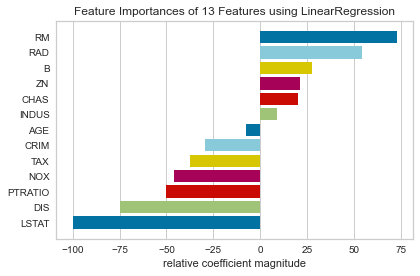

In [11]:
from yellowbrick.features import FeatureImportances

fig, ax = plt.subplots(figsize = (6,4))
fi_viz = FeatureImportances(lr2, labels = bos_X.columns)
fi_viz.fit(bos_sX, bos_y)
fi_viz.poof()
plt.show()

## Support Vector Machines

Support vector machines can perform regression as well. 
SWMs have the following properties:
* _Runtime efficiency_: The scikit-learn implementation is $O(n^{4})$, so it can be hard to scale to large sizes. Using a linear kernel or the `LinearSVR` model can improve the runtime performance at perhaps the cost of accurracy. Upping the `cache_size` parameter can bring that down to $O(n^{3})$
* _Preprocessing data_: The algorithm is not scale invariant, so standardizing the data is highly reccomended.
* _Prevent overfitting_: The penalty parameter `C` controls regularization. A smaller value allows for a smaller margin in the hyperplane. A higher value for `gamma` will tend to overfit the training data. The `LinearSVR` model supports a `loss` and `penalty` parameter for regularization. The `epsilon` parameter can be raised (with 0 you should expect overfitting)
* _Interpret results_ Inspect `.support_vectors_`, though these are hard to interpret. With linear kernels, you can inspect `.coef_`. 

In [12]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(bos_sX_train, bos_y_train)
SVR(C=1.0, cache_size = 200, coef0=0.0, degree = 3, 
   epsilon =  0.1, gamma = 'auto', kernel = 'rbf', max_iter = -1, shrinking=True, tol = 0.001, verbose = False)

SVR(gamma='auto')

In [13]:
svr.score(bos_sX_test, bos_y_test)

0.6551893976487937

__Instance parameters__ 

* `C=1.0` The penalty parameter. The smaller the value, the tighter the decision boundary (more overfitting). 
* `cache_size = 200` Cache Size (MB). Bumping this up can improve training time on large datasets. 
* `coef0 = 0.0` Independent term for poly and sigmoid kernels. 
* `epsilon = 0.1` Defines a margin of tolerance where no penalty is given to errors. Should be smaller for large datasets. 
* `degree = 3` Degree of polynomial kernel. 
* `gamma = 'auto'` Kernel coefficent. Can be a number, `'scale'` (default in 0.22, 1/ num features * X.std()), pr `'auto'` (default prior, 1/num_features). A lower value leads to overfitting the training data. 
* `kernel = 'rbf'` Kernel type: `'linear'`, `'poly'`, `'rbf'`(default), `'sigmoid'`, `'precomputed'`, or a function. 
* `max_iter = -1` Maximum number of iterations for solver. -1 for no limit. 
* `probability = False` Enable probability estimations. Slows down training. 
* `random_state = None` Random seed. 
* `shrinking = True` Use shrinking heuristic. 
* `tol = 0.01` Stopping tolerance.
* `verbose = False` Verbosity 

__Attributes after fitting__

* `support_vectors` Support vectors 
* `coef_` Cofficients (for linear) kernel
* `intercept_` Constant for decision function 

## K-Nearest Neighbor


The KNN model also supports regression by finding k neighbor targets to the sample for which you want to predict. For regression, this model averages the targets together to determine a prediction. 

Nearest neighbors models have the following properties: 

* _Runtime efficiency_ Training runtime is $O(1)$, but there is a trade-off as the sample data needs to be stored. Testing runtime is $O(Nd)$, where $N$ is the number of training examples and $d$ is dimensionality
* _Preprocess data_ Yes, distance-based calculations perform better when standardized. 
* _Prevent overfitting_ Raise `n_neighbors`. Change p for L1 or L2 metric. 
* _Interpret results_ Interpret the k-nearest neighbors to the sample (using the `.kneighbors` method). Those neighbors (if you can explain them) explain your result. 

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
knr = KNeighborsRegressor()
knr.fit(bos_sX_train, bos_sy_train)
KNeighborsRegressor(algorithm ='auto', leaf_size = 30, metric = 'minkowski', 
                    metric_params = None, n_jobs = 1, n_neighbors = 5, p = 2, weights = 'uniform'
                )
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592416

__Attributes__

* `algorithm = 'auto'` Can be `'brute'`, `'ball_tree'` or `'kd_tree'`
* `leaf_size = 30` Used for tree algorithms 
* `metric = 'minkowski'` Metric used
* `metric_params = None` Additional dictionary of parameters for custom metric function. 
* `n_jobs = 1` Number of neighbors
* `p=2` Minkowski power paramter. 1 = manhattan (L1). 2 = euclidean (L2). 
* `weights = 'uniform'` Can be `'distance'`, in which case, closer points hav more influence. 

## Decision Tree 

Decision trees support classification and regression. At each level of the tree, various splits on features are evaluated. The split that will produce the lowest error (impurity) is chosen. The `criterion` parameter can be adjusted to determine the metric for impurity. 

Decision trees have the following properties: 

* _Runtime efficiency_ For creation, loop over each of the m features we have to sort all n samples: $O(mn \log n)$. For predictng, you walk the tree $O(height)$
* _Preprocess data_ Scaling not necessary. Need to get rid of missing values and convert to numeric. 
* _Preventing overfitting_ Set `max_depth` to a lower number, raise `min_impurity_decrease`. 
* _Interpret results_ Can step through the tree of choices. Because there are steps, a tree is bad at dealing with linear relationships (a small change in the values of the feature can cause a completely different tree to be formed). The tree is also highly dependent on the training data. A small change can change the whole tree. 

In [16]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(bos_X_train, bos_y_train)
DecisionTreeRegressor(criterion = 'mse', max_depth = None, max_features = None, max_leaf_nodes = None, min_impurity_decrease=0.0,
                     min_samples_split=None, min_samples_leaf=1, min_impurity_split=2, min_weight_fraction_leaf=0.0,
                     random_state=42, splitter = 'best')
dtr.score(bos_X_test, bos_y_test)


0.8444833592340152

__Instance parameter__

 * `criterion = 'mse'` Splitting function. Default is mean squared error (L2 loss).`friedman_mse` or `mse` (L1 loss). 
 * `max_depth = None` Depth of tree. Default will build until leaves contain ess than `min_samples_split`
 * `max_features = None` Number of features to examine for split. Default is all. 
 * `max_leaf_nodes = None` Limit number of leaves. Default is unlimited. 
 * `min_impurity_decrease = 0.0` Split node if a split will decrease impurity >= value. 
 * `min_impurity_split = None` Deprecated
 * `min_sample_leaf = 1` Minimum number of samples at each leaf 
 * `min_sample_split = 2` Minimum number of samples required to split a node. 
 * `min_weight_fraction_leaf = 0.0` Minimum sum of weights required for leaf nodes. 
 * `random_state = None` Random seed 
 * `splitter = 'best'` Use `'random'`or `'best'`
 
 
 __Attribute after fitting__
 
 *  `feature_importances_ ` Array of Gini importance
 * `max_features_` Computed value of `max_features`. 
 * `n_outputs_` Number of outputs
 * `n_features_` Number of features 
 * `tree_` Underlying tree object 

### View trees

In [17]:
import pydotplus 
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz



In [18]:

dot_data = StringIO()
export_graphviz(
                dtr,
                out_file = dot_data,
                feature_names=bos_X.columns,
                filled = True)

g = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [22]:
# Image(g.create_png()) 
# It works on colab 
#Probably there is a problem with the library of graphviz that should be solved
#https://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8

The dtreeviz package to view a scatter plot at each of the nodes of the tree. We will use a tree limited to a depth of two so we can see the details:

In [25]:
import dtreeviz

dtr3 = DecisionTreeRegressor(max_depth = 2)
dtr3.fit(bos_X_train, bos_y_train)
viz = dtreeviz.trees.dtreeviz(
                            dtr3,
                            bos_X,
                            bos_y,
                            target_name = 'price',
                            feature_names = bos_X.columns)
#viz 
#also this plot works on colab but due to some error in the graphviz library it does not work here

### Features importance 

In [28]:
for col, val in sorted(zip(bos_X.columns, dtr.feature_importances_), key = lambda x:x[1], reverse = True)[:5]:
    print(f'{col:10}{val:10.3f}')

RM             0.576
LSTAT          0.190
DIS            0.110
CRIM           0.058
PTRATIO        0.025


## Random Forest

Decision trees are good because they are explanable, but they have a tendency to overfit. A random forest trades some of the explainability for a model that tends to generalize better. This model can also be used for regression. 

Random forests have the following properties:

* __Runtime efficiency__ Need to create j random trees. This can be done in parallel using `n_jobs`. Complexity for each tree is $O(mn \log n)$, where n is the number of samples and m is the number of features. For criterion, loop over each of the m features, and sort all n samples: $O(mn \log n)$ For predicting, you walk the tree: $O(height)$  
* __Process data__ Not necessary as long as the input is numeric and not missing values
* __Prevent overfitting__ Add more trees (`n_estimators`). Use lower `max_depth`. 
* __Interpret results__ Support feature importance, but we do not have a single decision tree that we can walk through. Can inspect single trees from the ensamble.  

In [32]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 42, n_estimators = 100)
rfr.fit(bos_X_train, bos_y_train)
RandomForestRegressor(bootstrap = True, criterion = 'mse', max_depth = None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs = 1, oob_score=False, random_state=42, verbose = 0, warm_start=False)
rfr.score(bos_X_test, bos_y_test)

0.8708997131330258

We avoid repeting the instance parameters since they mirror the ones of decision trees.

In [33]:
# Feature importance

for col,val in sorted(zip(bos_X.columns, rfr.feature_importances_), key = lambda x : x[1], reverse = True)[:5]:
    print(f'{col:10}{val:10.3f}')

RM             0.440
LSTAT          0.380
DIS            0.066
CRIM           0.032
PTRATIO        0.019


## XGBoost Regression

The XGBoost library also supports regression. It builds a simple decision tree, then 'boosts' it by adding subsequent trees. Each tree tries to correct the residuals of the previous output. In practice, this works quite well on strucutred data. 

It has the following properties:
* __Runtime efficiency__ : XGBoost is parallelizeable. Use the `n_jobs` option to indicate the number of CPUs. Use GPU for even better performance.
* __Preprocess data__ : No scaling necessary with tree models. Need to encode categorical data. Supports missing data. 
* __Prevent overfitting__: The `early_stopping_rounds=N` parameter can be set to stop training if there is no improvement after N rounds. L1 and L2 regularization are controlled by `reg_alpha` and `reg_lambda`, respectively. Higher numbers mean more conservative. 
* __Interpret results__ Haas feature importance.

In [35]:
import xgboost as xgb

xgr = xgb.XGBRegressor(random_state = 42)
xgr.fit(bos_X_train, bos_y_train)
xgb.XGBRegressor(base_score = 0.5, booster = 'gbtree', colsample_bylevel= 1, col_sample_bytree = 1, gamma = 0, learning_rate = 0.1, 
            max_delta_step = 0, max_depth = 3, min_child_weight = 1, missing = None, n_estimators = 100, n_jobs = 1, nthread = None,
            objective = 'reg:linear', random_state = 42, reg_alpha = 0, reg_lambda = 1, scale_pos_weight =1, seed = None, silent = True, 
            subsample = 1)
xgr.score(bos_X_test, bos_y_test)

0.876009538173606

In [36]:
xgr.predict(bos_X.iloc[[0]])

array([28.331783], dtype=float32)

__Instance parameters__

* `max_depth = 3` Maximum depth
* `learning_rate = 0.1` Learning rate (eta) for boosting between 0 and 1. After each boost step, the newly added weights are scaled by this factor. The lower the value, the more conservative, but will also need more trees to converge. In the call to `.train` you can pass a `learning_rates` parameter, which is a list of rates at each round. 
* `n_estimators = 100` Number of rounds or boosted trees. 
* `silent = True` Whether to print messages while running boosting 
* `objective = 'reg:linear'` Learning task or callable for classification
* `booster = 'gbtree'` Can be 'gbtree', 'gblinear' or 'dart'. The dart option adds dropout (drops random trees to prevent overftitting). The gblinear option creates a regularized linear model (read not a tree but similar to lasso regression)
* `nthread = None` Deprecated
* `n_jobs = 1` Number of threads to use 
* `gamma = 0` Minimum loss reduction needed to further split a leaf. 
* `min_child_weight =1` Minimum value for sum hessian for a child
* `min_delta_step = 0` Make update more conservative. Set 1 to 10 for imbalanced classes.
* `subsample = 1` Fraction of samples to use for next boosting round. 
* `colsample_bytree = 1` Fraction of columns to use for boosting round. 
* `colsample_bylevel = 1` Fraction of columns to use for level in tree
* `colsample_bynode =1` Fraction of columns to use for split ( node in tree). 
* `reg_alpha = 0` L1 regularization (mean of weights). Increase to be more conservative. 
* `reg_lambda = 1` L2 regularization ( root of sqaured weights). Increase to be more conservative 
* `base_score = .5` Initial prediction 
* `seed = None` Deprecated
* `random_state` Random seed 
* `missing = None` Value to interpret for missing 
* `importance_type = 'gain'` The feature importance type = 'gain', 'weight', 'cover', 'total_gain', or 'total_cover'. 

__Attributes__ 

* `coef_` Coefficients fro gblinear learners (boosters = 'gblinear')
* `intercept` Intercept for gblinear learners
* `feature_importances_` Feature importances for gbtree learners. 

Feature importance is the average gain across all the nodes where the feature is used:

In [38]:
for col,val in sorted(zip(bos_X.columns, xgr.feature_importances_), key = lambda x:x[1], reverse = True)[:5]:
    print(f'{col:10}{val:10.3f}')

LSTAT          0.583
RM             0.193
PTRATIO        0.063
DIS            0.057
TAX            0.026


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

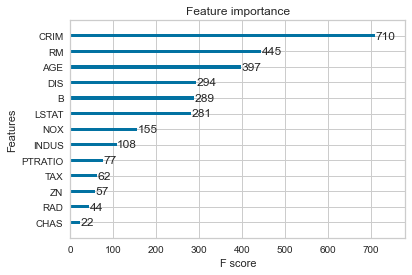

In [39]:
fig, ax = plt.subplots(figsize = (6,4))
xgb.plot_importance(xgr, ax = ax)


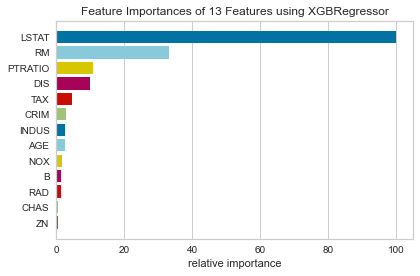

In [40]:
fig, ax = plt.subplots(figsize = (6,4))
fi_viz = FeatureImportances(xgr)
fi_viz.fit(bos_X_train, bos_y_train)
fi_viz.poof()
plt.show()

XGBoost provides both a textual representation of the trees and a graphical one. Here is the text representation:

In [41]:
booster = xgr.get_booster()
print(booster.get_dump()[0])

0:[LSTAT<7.86499977] yes=1,no=2,missing=1
	1:[RM<7.43700027] yes=3,no=4,missing=3
		3:[RM<6.65649986] yes=7,no=8,missing=7
			7:leaf=7.27536583
			8:leaf=9.32700062
		4:[CRIM<2.74223518] yes=9,no=10,missing=9
			9:leaf=12.9495659
			10:leaf=3.21000004
	2:[LSTAT<16.0849991] yes=5,no=6,missing=5
		5:[B<47.7250023] yes=11,no=12,missing=11
			11:leaf=2.59500003
			12:[LSTAT<7.89000034] yes=15,no=16,missing=15
				15:leaf=1.71000004
				16:leaf=6.37612295
		6:[DIS<1.94000006] yes=13,no=14,missing=13
			13:[CRIM<9.87001991] yes=17,no=18,missing=17
				17:leaf=3.65125012
				18:[NOX<0.675000012] yes=21,no=22,missing=21
					21:leaf=3.31333327
					22:leaf=2.14058828
			14:[B<333.470001] yes=19,no=20,missing=19
				19:leaf=3.77684236
				20:leaf=5.19964314



The leaf values can be interpreted as the sum of the `base_score` and the leaf. 

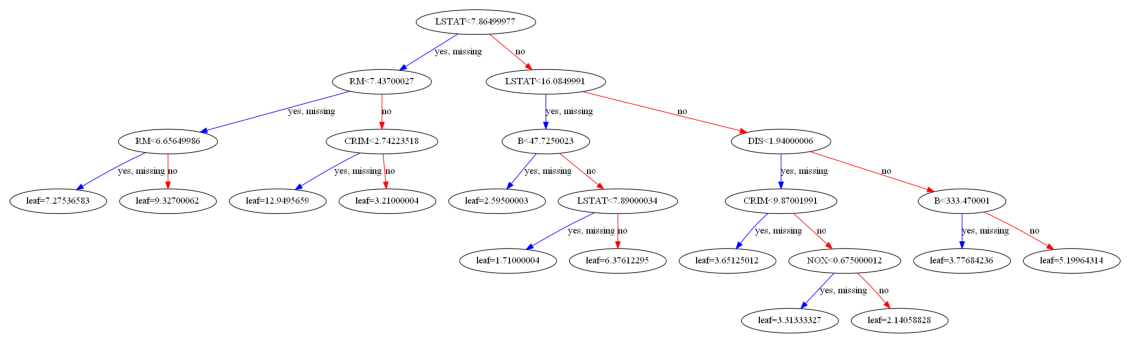

In [47]:
fig, ax = plt.subplots(figsize = (20,15))
xgb.plot_tree(xgr, ax = ax , num_trees = 0)
plt.show()

## LightGBM Regression 

The gradient boosting tree library, LightGBM, also supports regression. It can be faster than XGBoost  for creating trees due to the sampling mechanism used to determine node splits. 
Also, remember that it grows trees depth first, so limitating depth may harm the model. It has the following properties:
* _Runtime efficiency_ Can take advantage of multiple CPUs. By using binning, can be 15 times faster than XGBoost. 
* _Preprocess data_ Has some support for encoding categorical columns as integers but AUC appeas to suffer compared to one-hot encoding. 
* _Prevent overfitting_ Lower `num_leaves`. Increase `min_data_in_leaf`. Use `min_gain_to_split` with `lambda_l1` or `lambda_l2` 
* _Interpret results_ Feature importance is available. Individual trees are weak and tend to be hard to interpret. 

In [48]:
import lightgbm as lgb 

lgr = lgb.LGBMRegressor(random_state = 42)
lgr.fit(bos_X_train, bos_y_train)
lgb.LGBMRegressor(boosting_type = 'gbdt', class_weight = None, colsample_bytree = 1.0, learning_rate = 0.1, max_depth = -1, 
                 min_child_samples = 20, min_child_weight = 0.001, min_split_gain = 0.0, n_estimators = 100, n_jobs = -1,
                  num_leaves = 31, objective = None, random_state = 42, reg_alpha = 0.0, reg_lambda = 0.0, silent = True, 
                  subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0)

lgr.score(bos_X_test, bos_y_test)

0.847729219534575

In [49]:
lgr.predict(bos_X.iloc[[0]])

array([30.31689569])

__Instance parameters__

* `boosting_type = gbdt`Can be gbdt -> gradient boosting or rf -> random forest, dart -> dropouts met multiple additive regression trees or goss -> gradient based, one-sided sampling. 

* `max_leaves = 31` Maximum number of tree leaves. 
* `max_depth = -1` Maximum tree depth -1 i unlimited. Larger depths tend to overfit more. 
* `learning_rate = 0.1` Range (0,1.0). Learning rate for boosting. A smaller value slows down overfitting as the boosting rounds have less impact. A smaller number should gie better performance but will require more `num_iterations`. 
* `n_estimators = 100` Number of trees or boosting rounds. 
* `subsample_for_bin = 200000` Samples required to create bins 
* `objective = None` None does regression by default. Can be a function or a string 
* `min_split_gain = 0.0` Loss reduction required to partition leaf. 
* `min_child_weight = 0.001` Sum of hessian weight required for a leaf. Larger will be more conservative. 
* `min_child_samples = 20` Number of samples required for a leaf. Lower numbers mean more overfitting. 
* `subsamples = 1.0` Fraction of samples to use for the next round 
* `subsample_freq = 0` Subsample frequency. Change to 1 to enable. 
* `colsample_bytree = 1.0` Range ( 0,1.0). Select percent of features for each boosting round. 
* `reg_alpha = 0.0` L1 regularization (mean of weights). Increase to be more conservative. 
* `reg_lambda = 0.0` L2 regularization (root of squared weights). Increase to be more conservative.
* `random_state` Random seed.
* `n_jobs = -1` Number of threads. 
* `silent = True` Verbose mode.
* `importance_type = 'split'` Determines how importance is calculated: _split_ (times a feature was used) or _gain_ (total gains of splits when a feature was used)


LightGBM supports feature importance. The `importance_type` parameter determines how this is calculated ( the default is based on how many times a feature was used):

In [50]:
for col,val in sorted(zip(bos_X.columns, lgr.feature_importances_), key = lambda x:x[1], reverse = True)[:5]:
    print(f'{col:10}{val:10.3f}')

LSTAT        226.000
RM           199.000
DIS          172.000
AGE          130.000
B            121.000


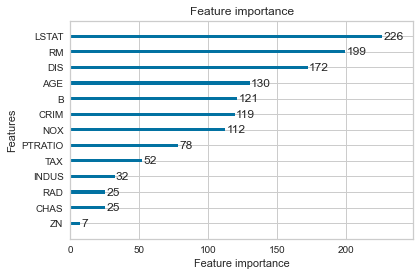

In [51]:
fig,ax = plt.subplots(figsize = (6,4))
lgb.plot_importance(lgr, ax = ax)
fig.tight_layout()